In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [8]:
# Dark mode for charts
colors = cycler('color', ['#669FEE', '#66EE91', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray'),
plt.rc('ytick', direction='out', color='gray'),
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')
plt.rc('figure', facecolor='#313233')

# Data Analysis

In [76]:
df = pd.read_csv('titanic.csv')

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


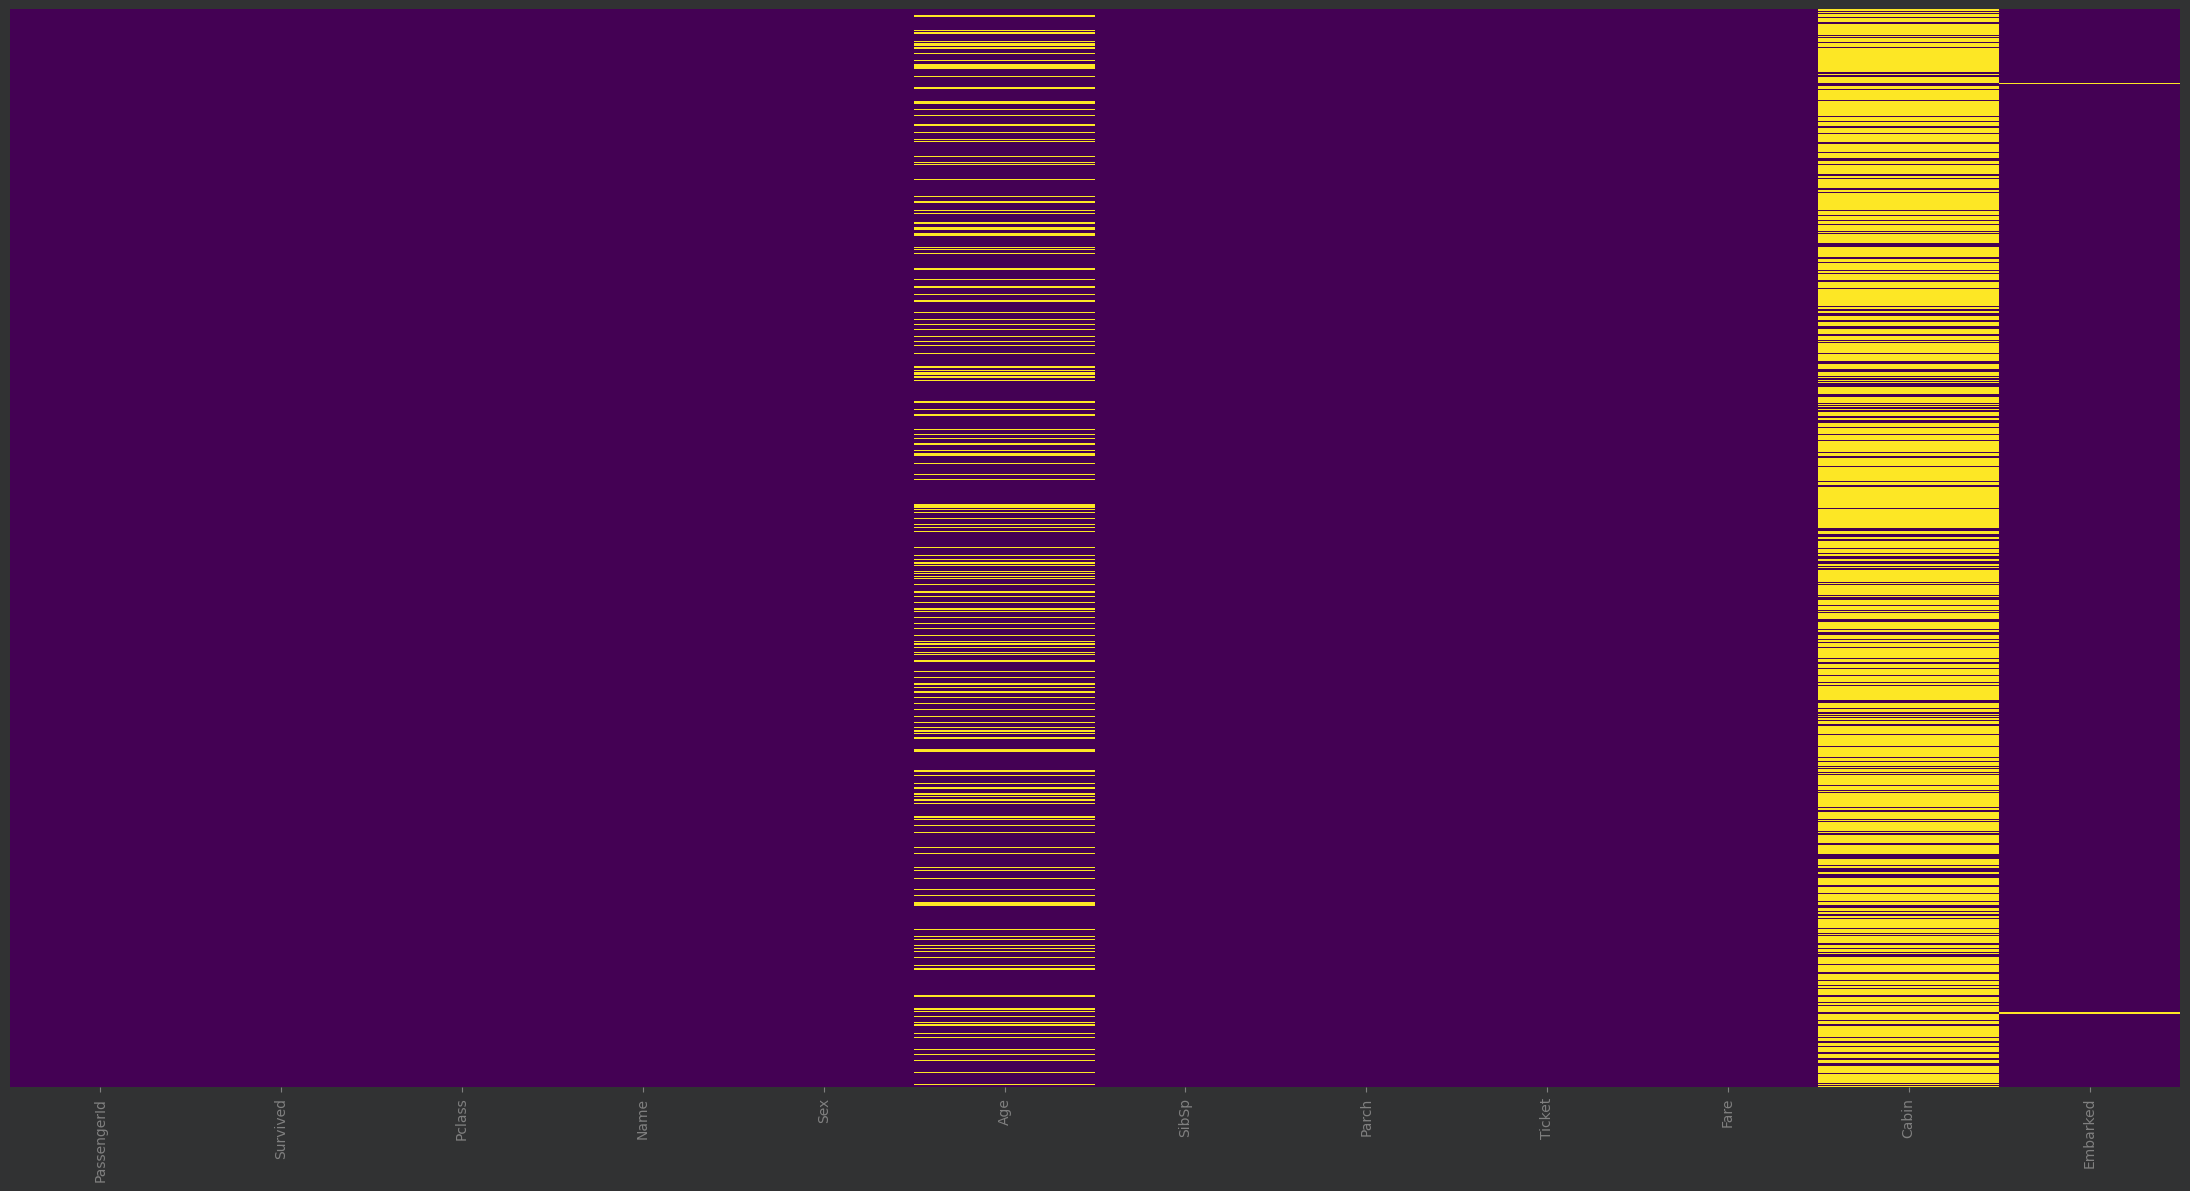

In [78]:
# plot the null values based on columns
heatmap_plot = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
fig = heatmap_plot.figure
fig.set_size_inches(28, 14)
plt.show()

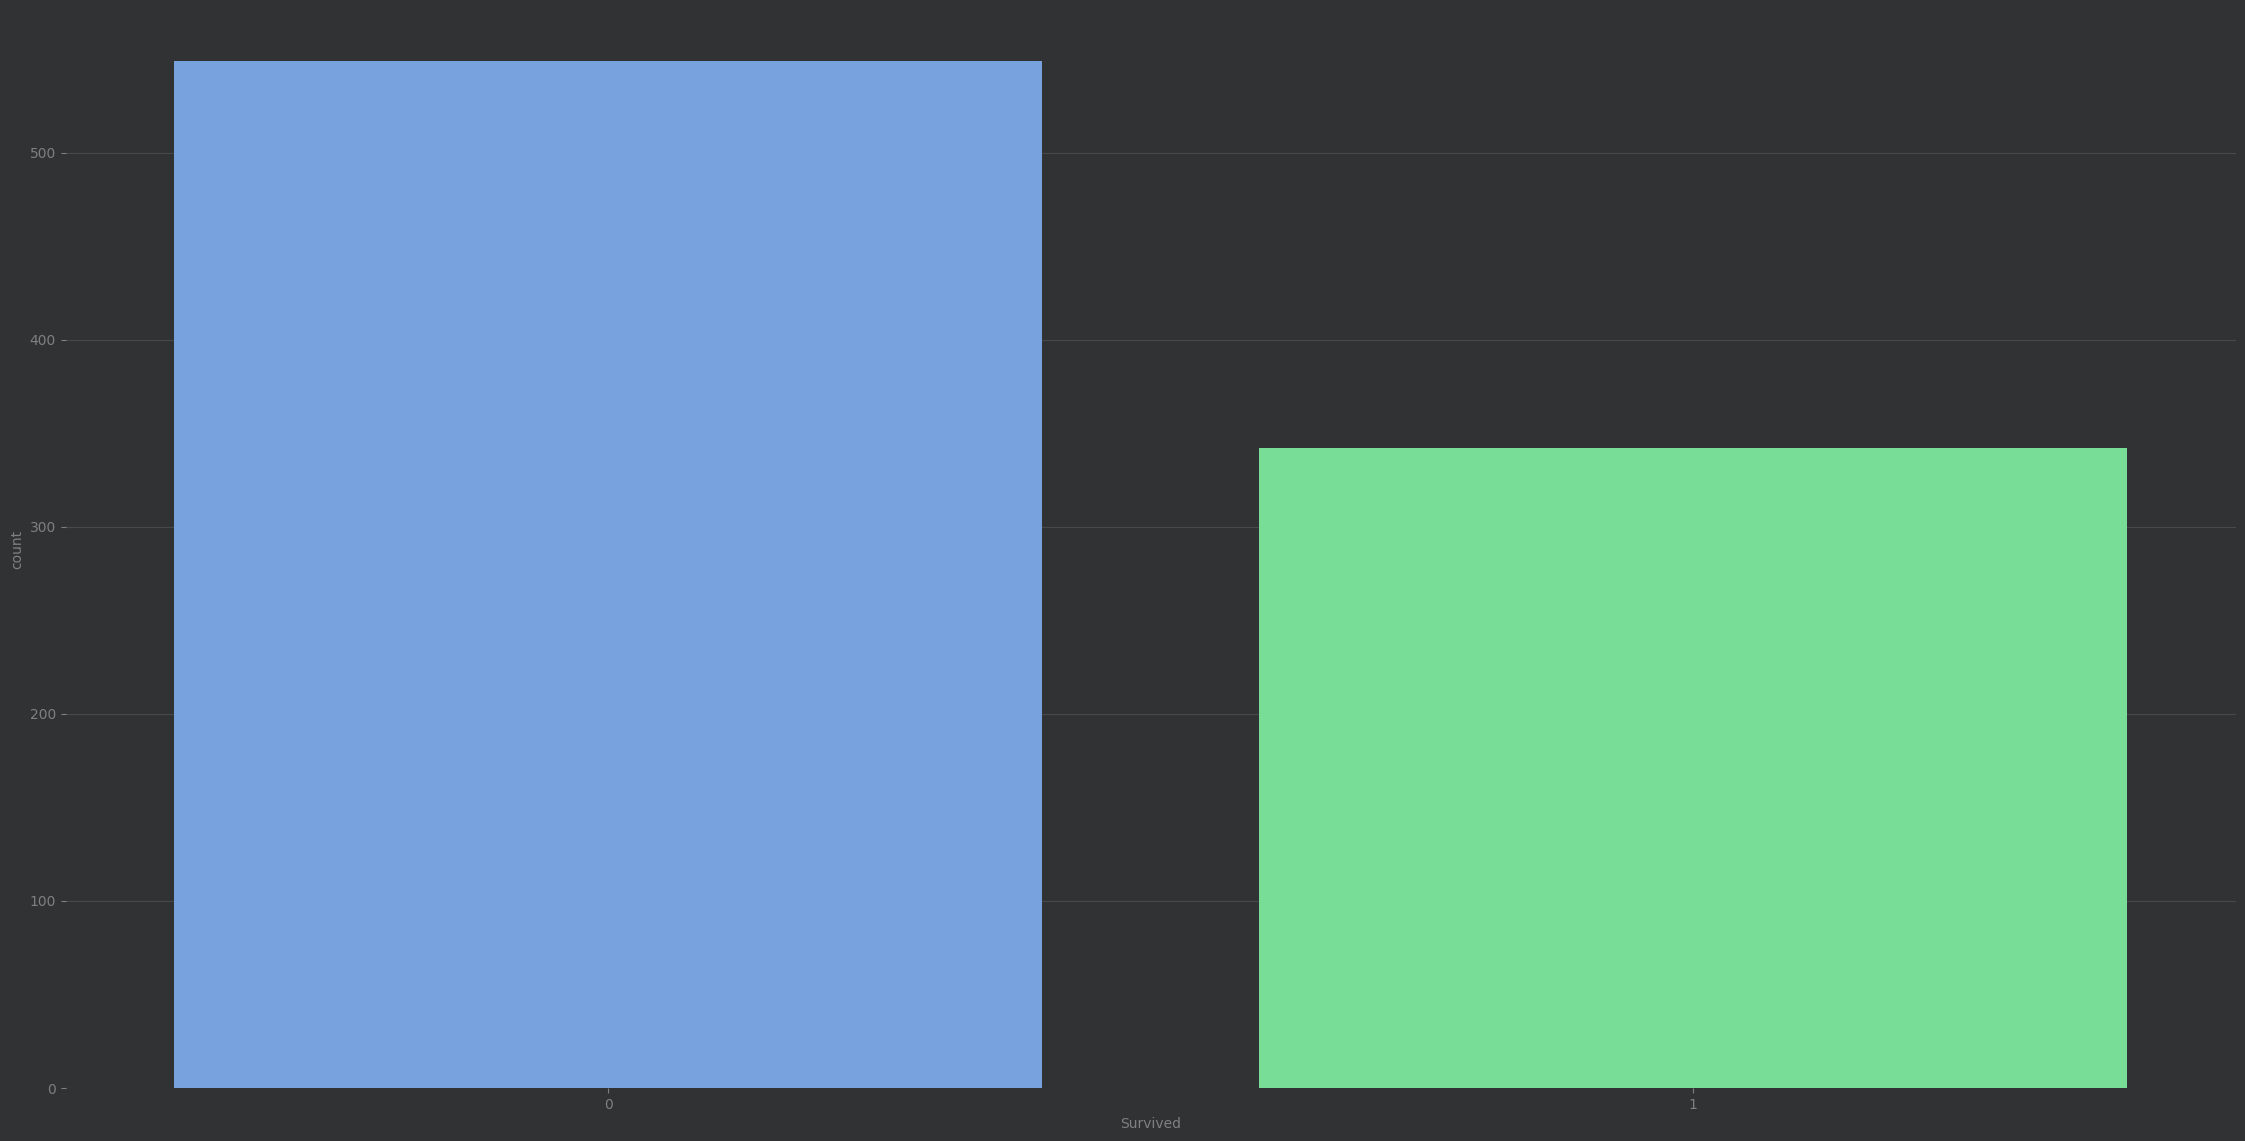

In [79]:
# check who survived 1 and who didn't 0
count_plot = sns.countplot(data=df, x='Survived')
fig = count_plot.figure
fig.set_size_inches(28, 14)
plt.show()

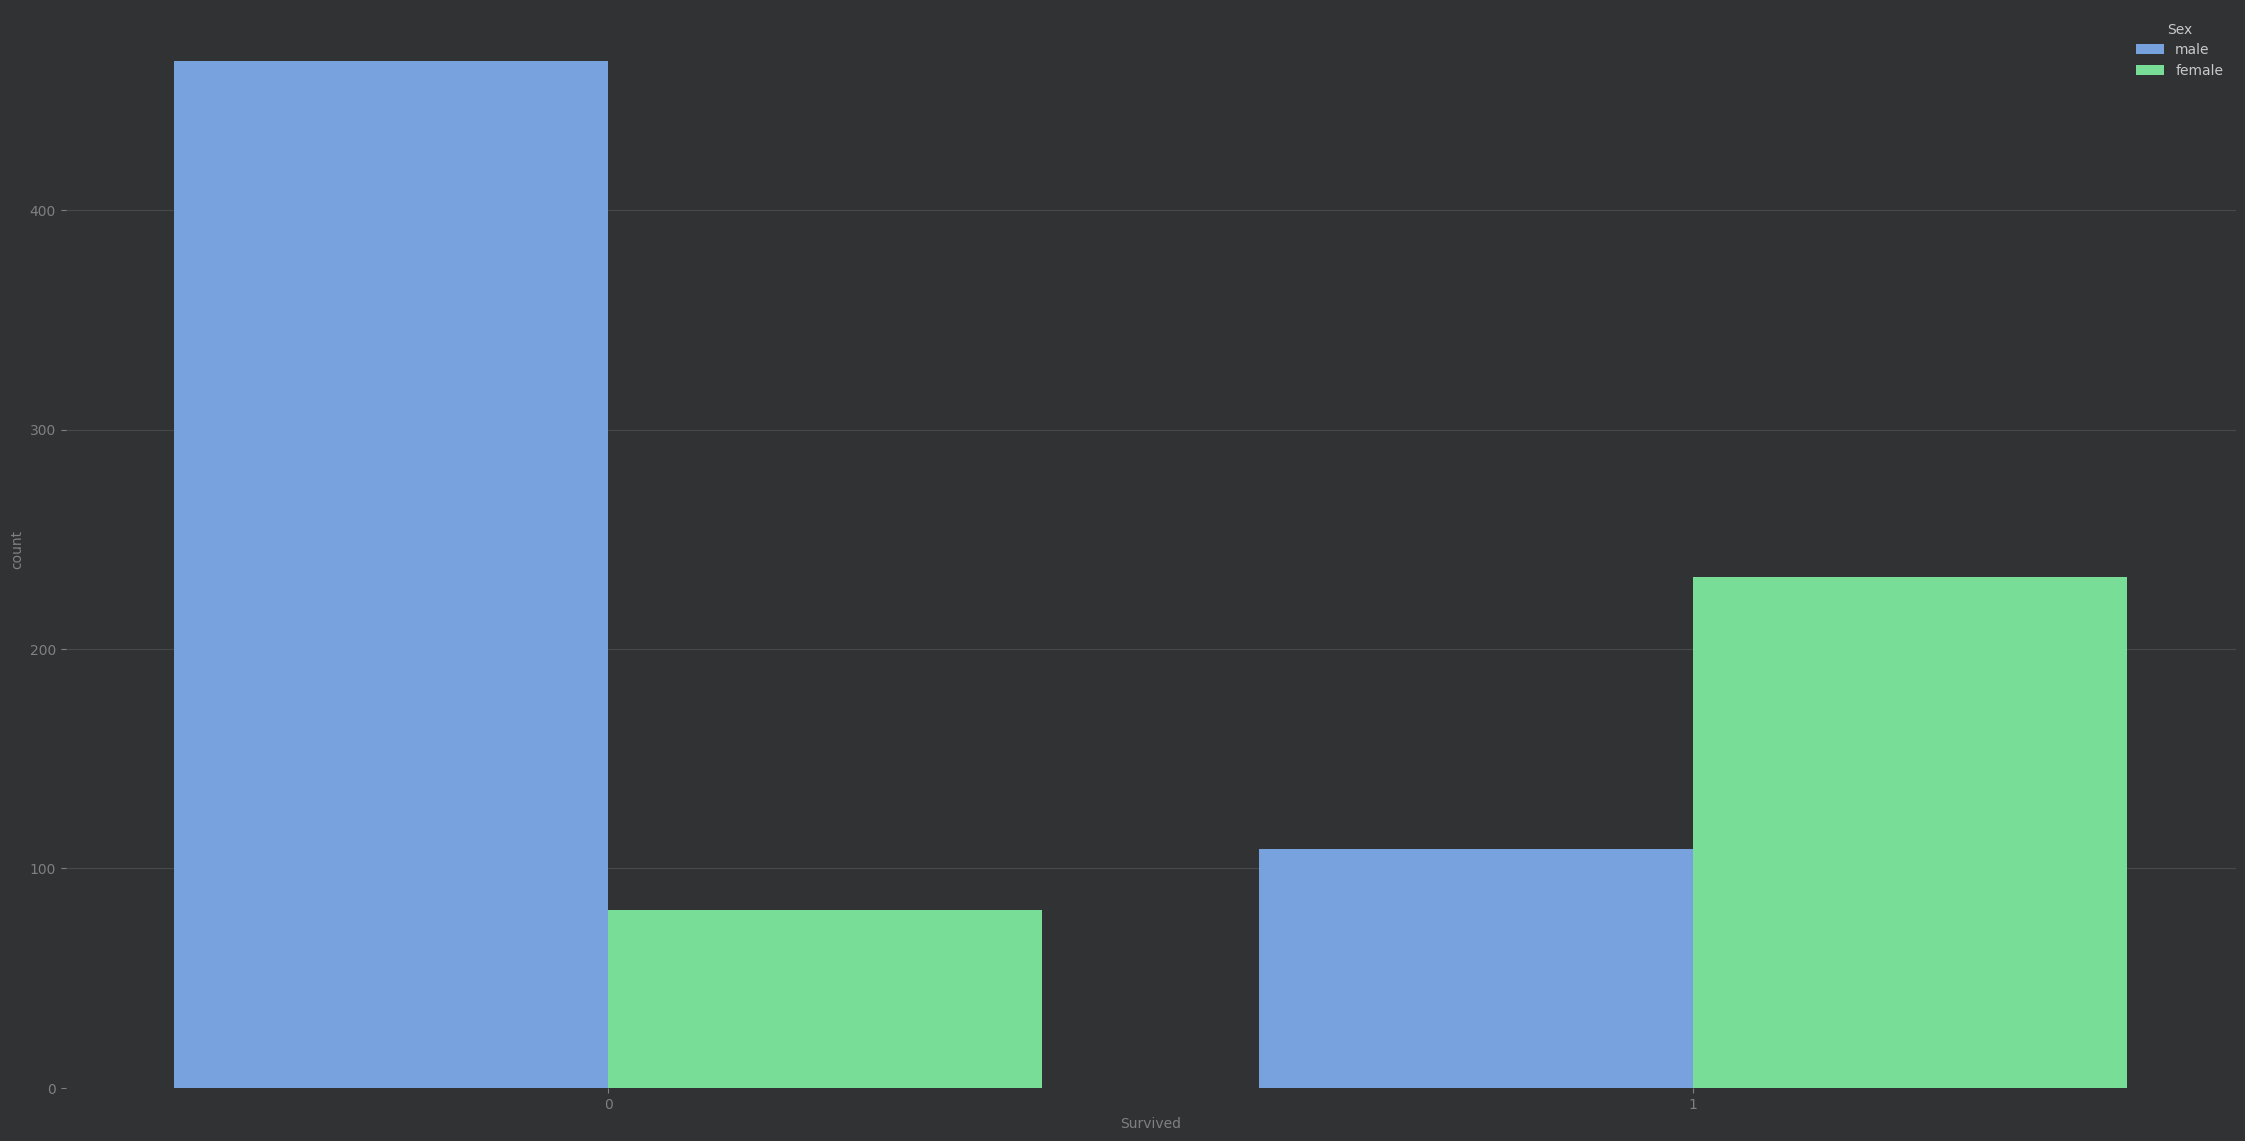

In [80]:
# check by sex who survived
count_plot_sex = sns.countplot(data=df, x='Survived', hue='Sex')
fig = count_plot_sex.figure
fig.set_size_inches(28, 14)
plt.show()

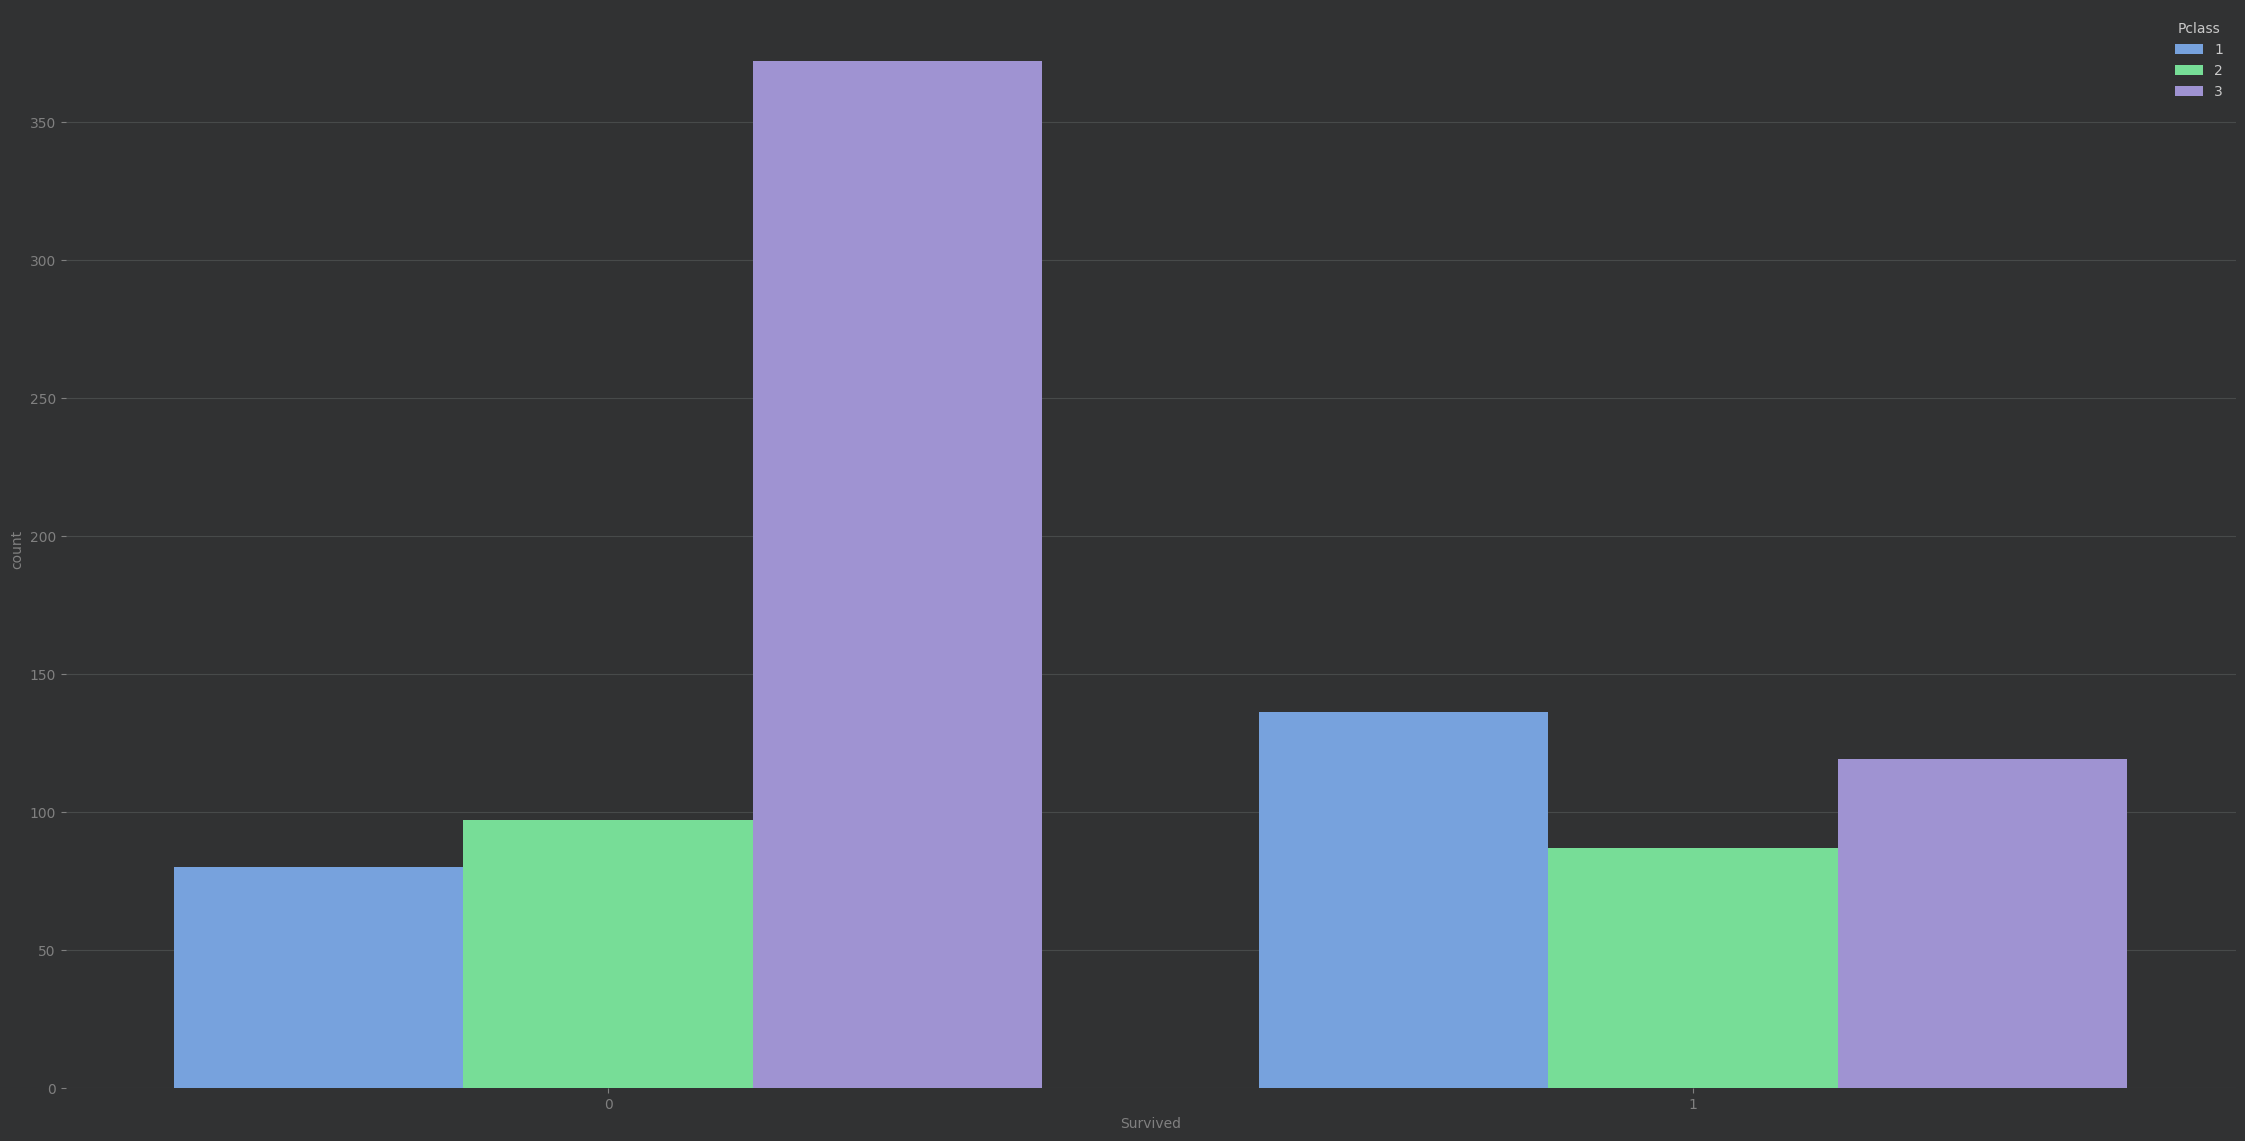

In [81]:
# check by passenger class who survived
count_plot_pclass = sns.countplot(data=df, x='Survived', hue='Pclass')
fig = count_plot_pclass.figure
fig.set_size_inches(28, 14)
plt.show()

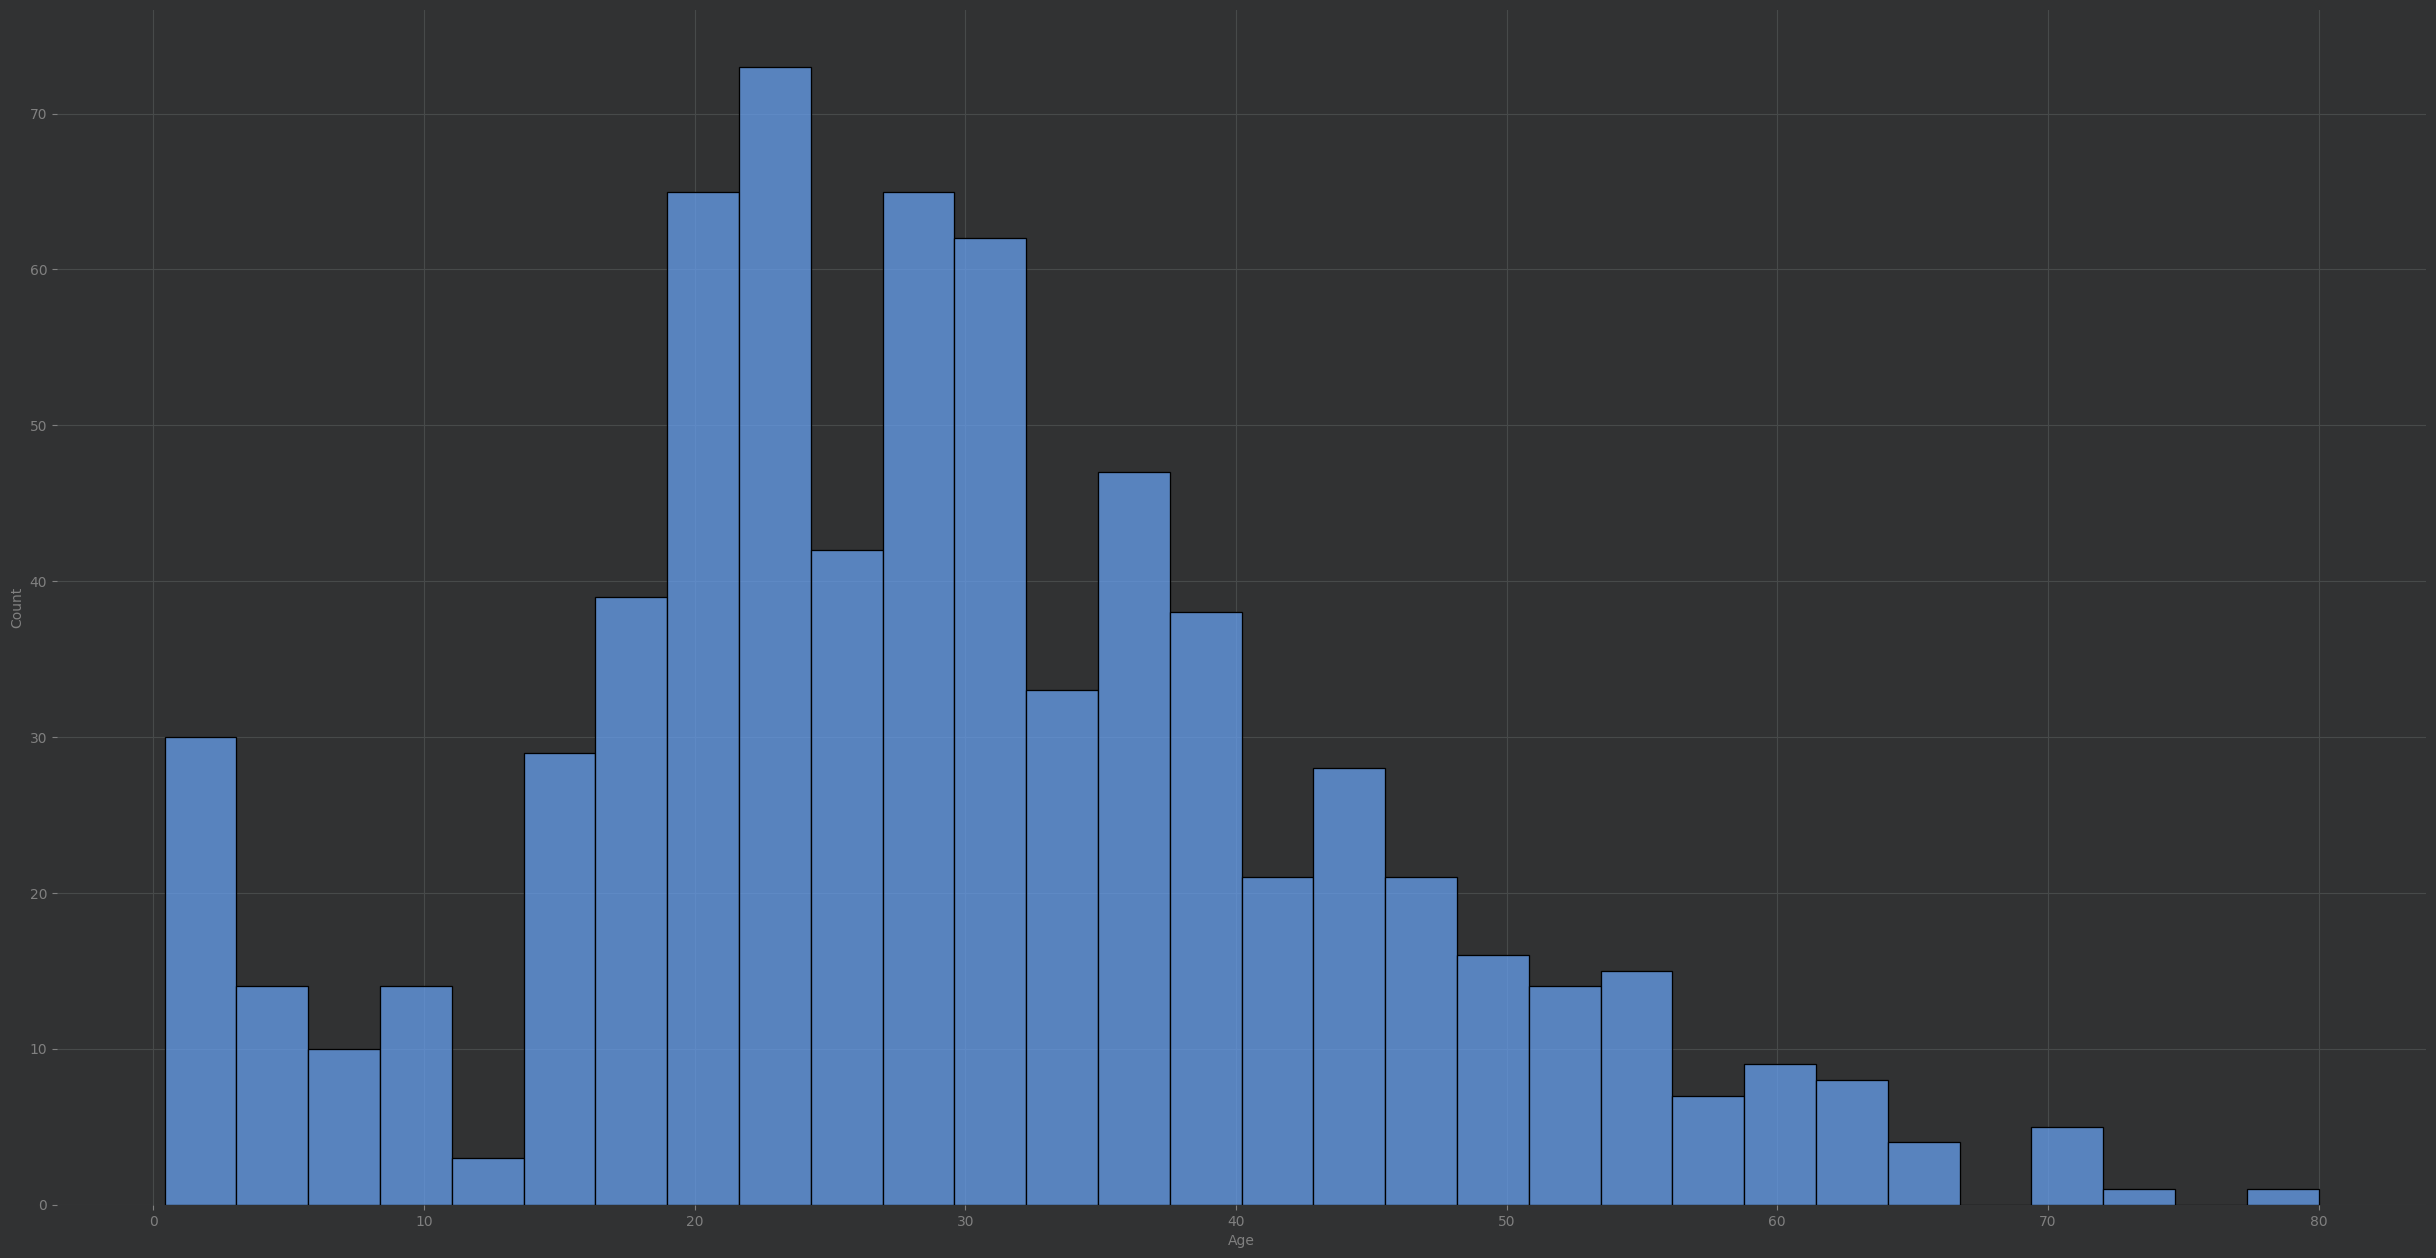

In [82]:
# check by age 
dis_plot_age = sns.displot(data=df['Age'].dropna(), kde=False, bins=30)
fig = dis_plot_age.fig
fig.set_size_inches(28, 14)
plt.show()

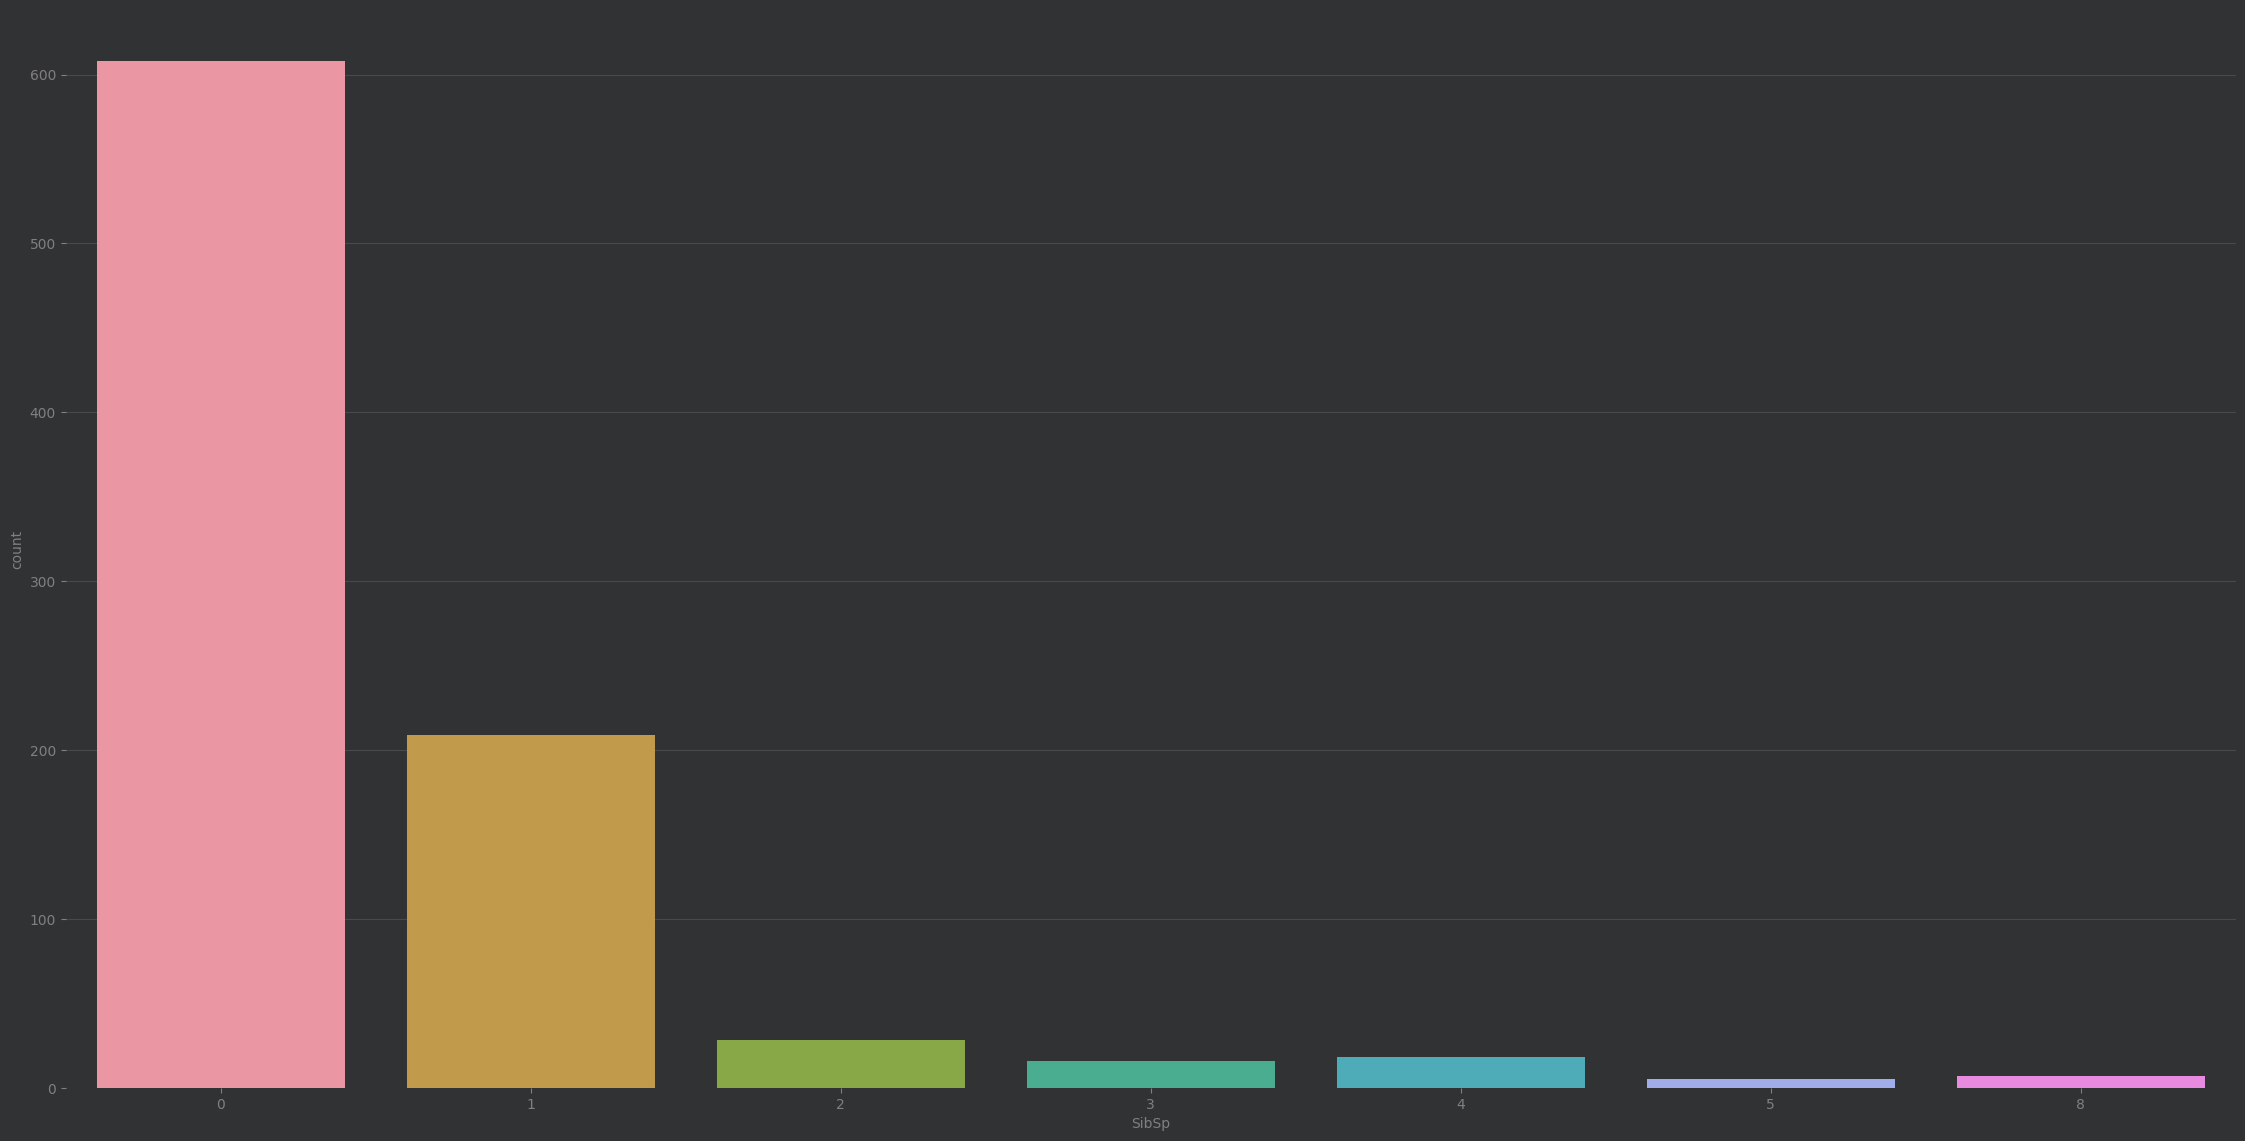

In [83]:
# check siblings and spouses on board
count_plot_sibsp = sns.countplot(data=df, x='SibSp')
fig = count_plot_sibsp.figure
fig.set_size_inches(28, 14)
plt.show()

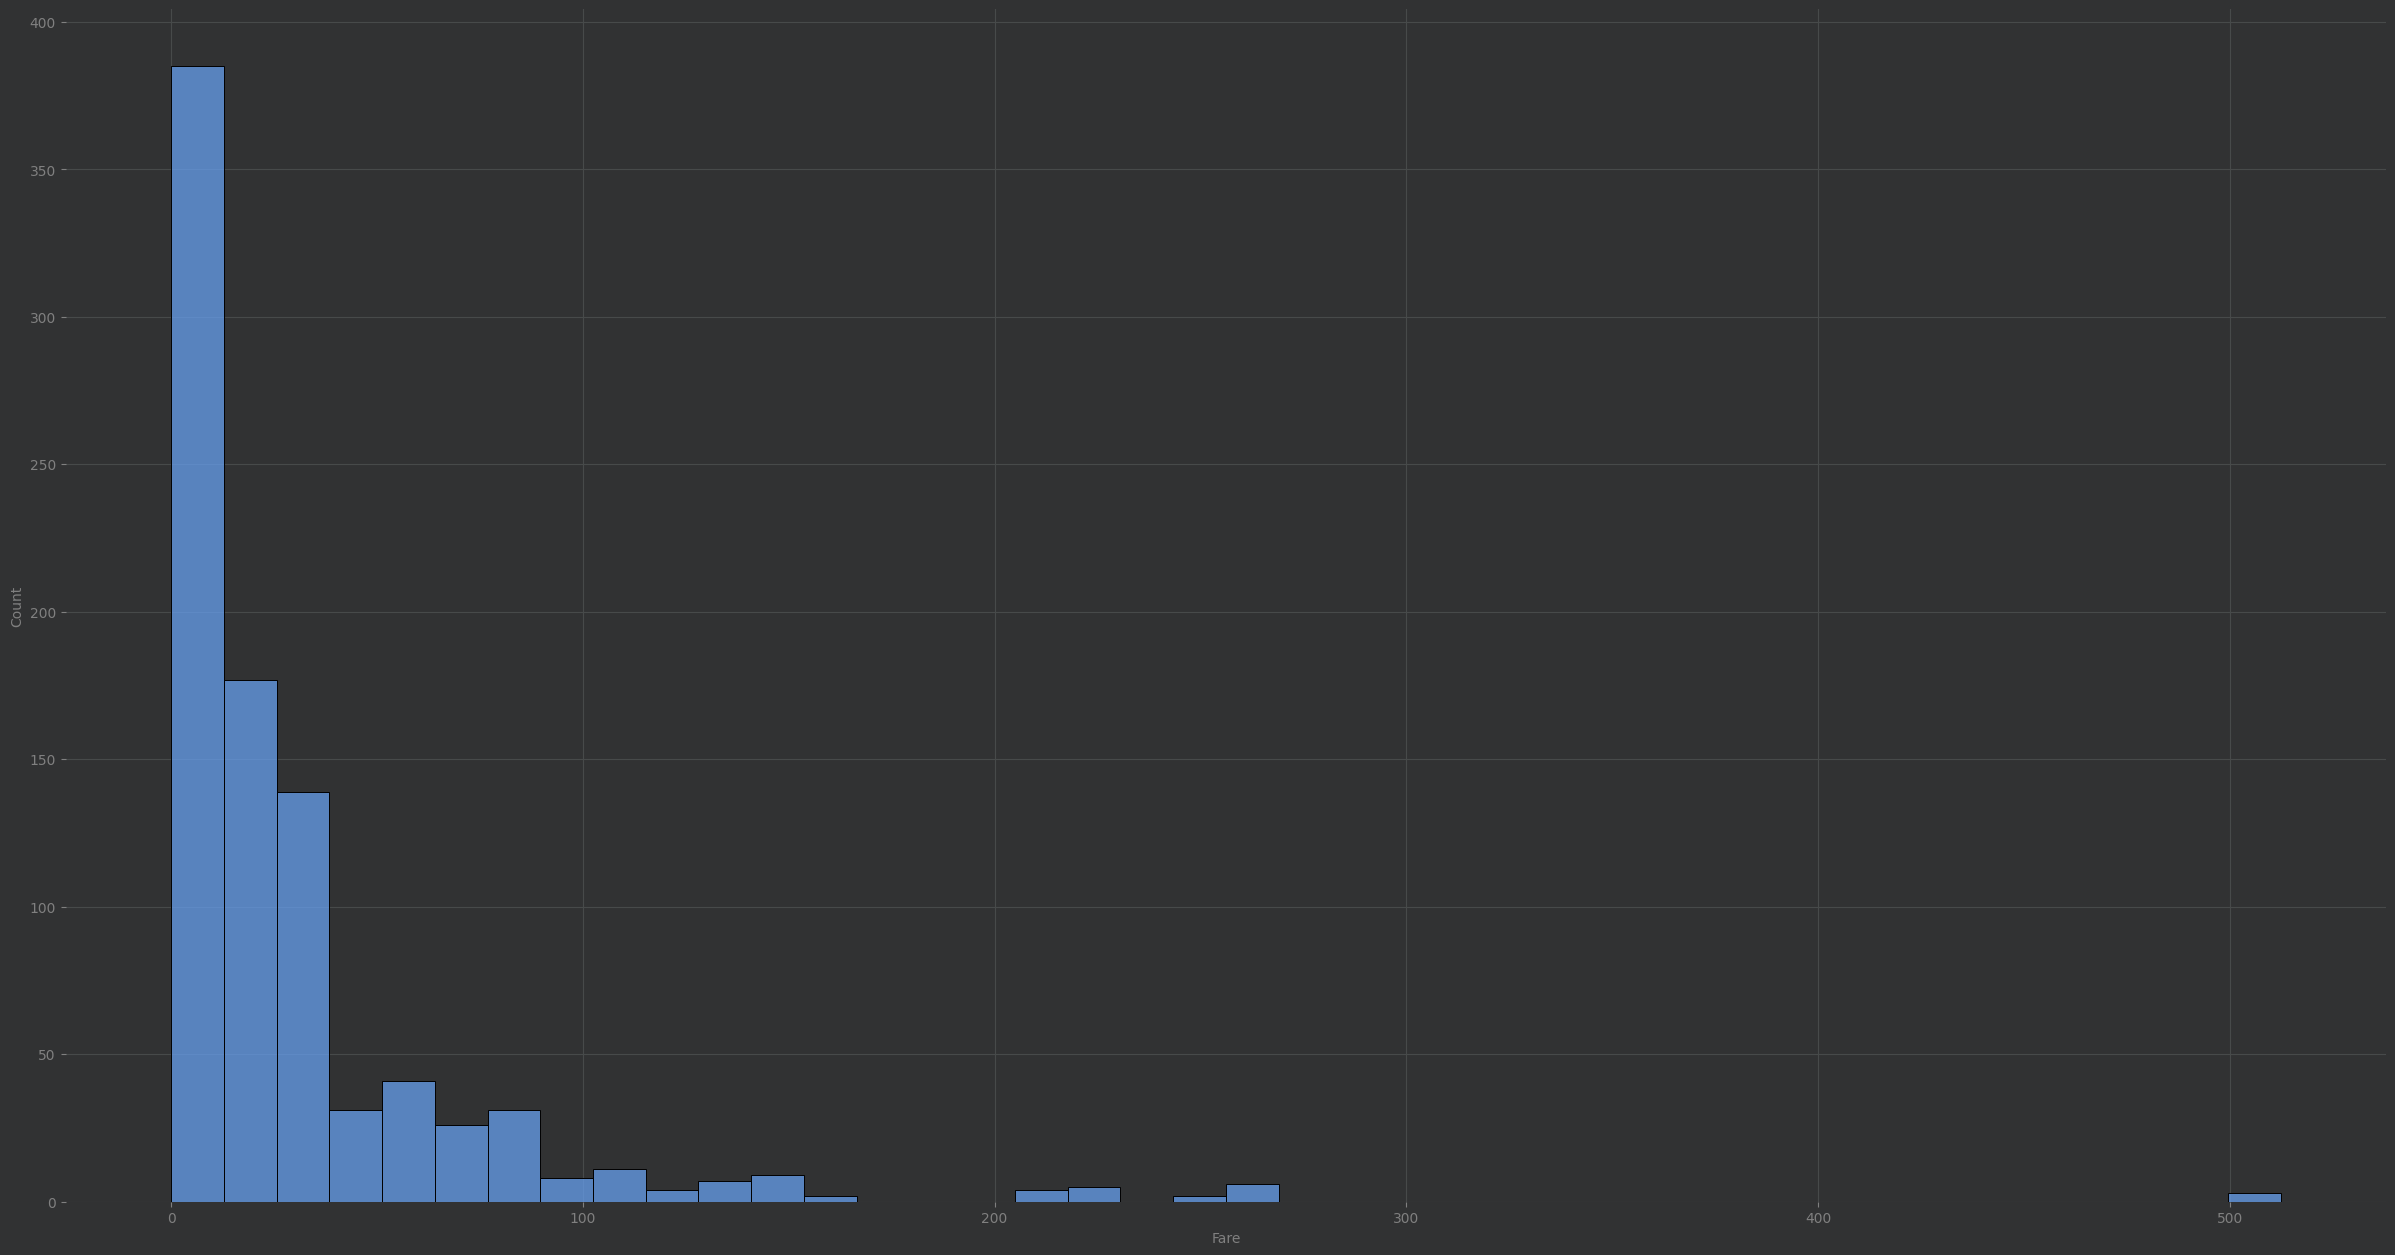

In [84]:
# check by fare, payments from cheap to expensive
dis_plot_fare = sns.displot(data=df['Fare'], bins=40)
fig = dis_plot_fare.fig
fig.set_size_inches(28, 14)
plt.show()

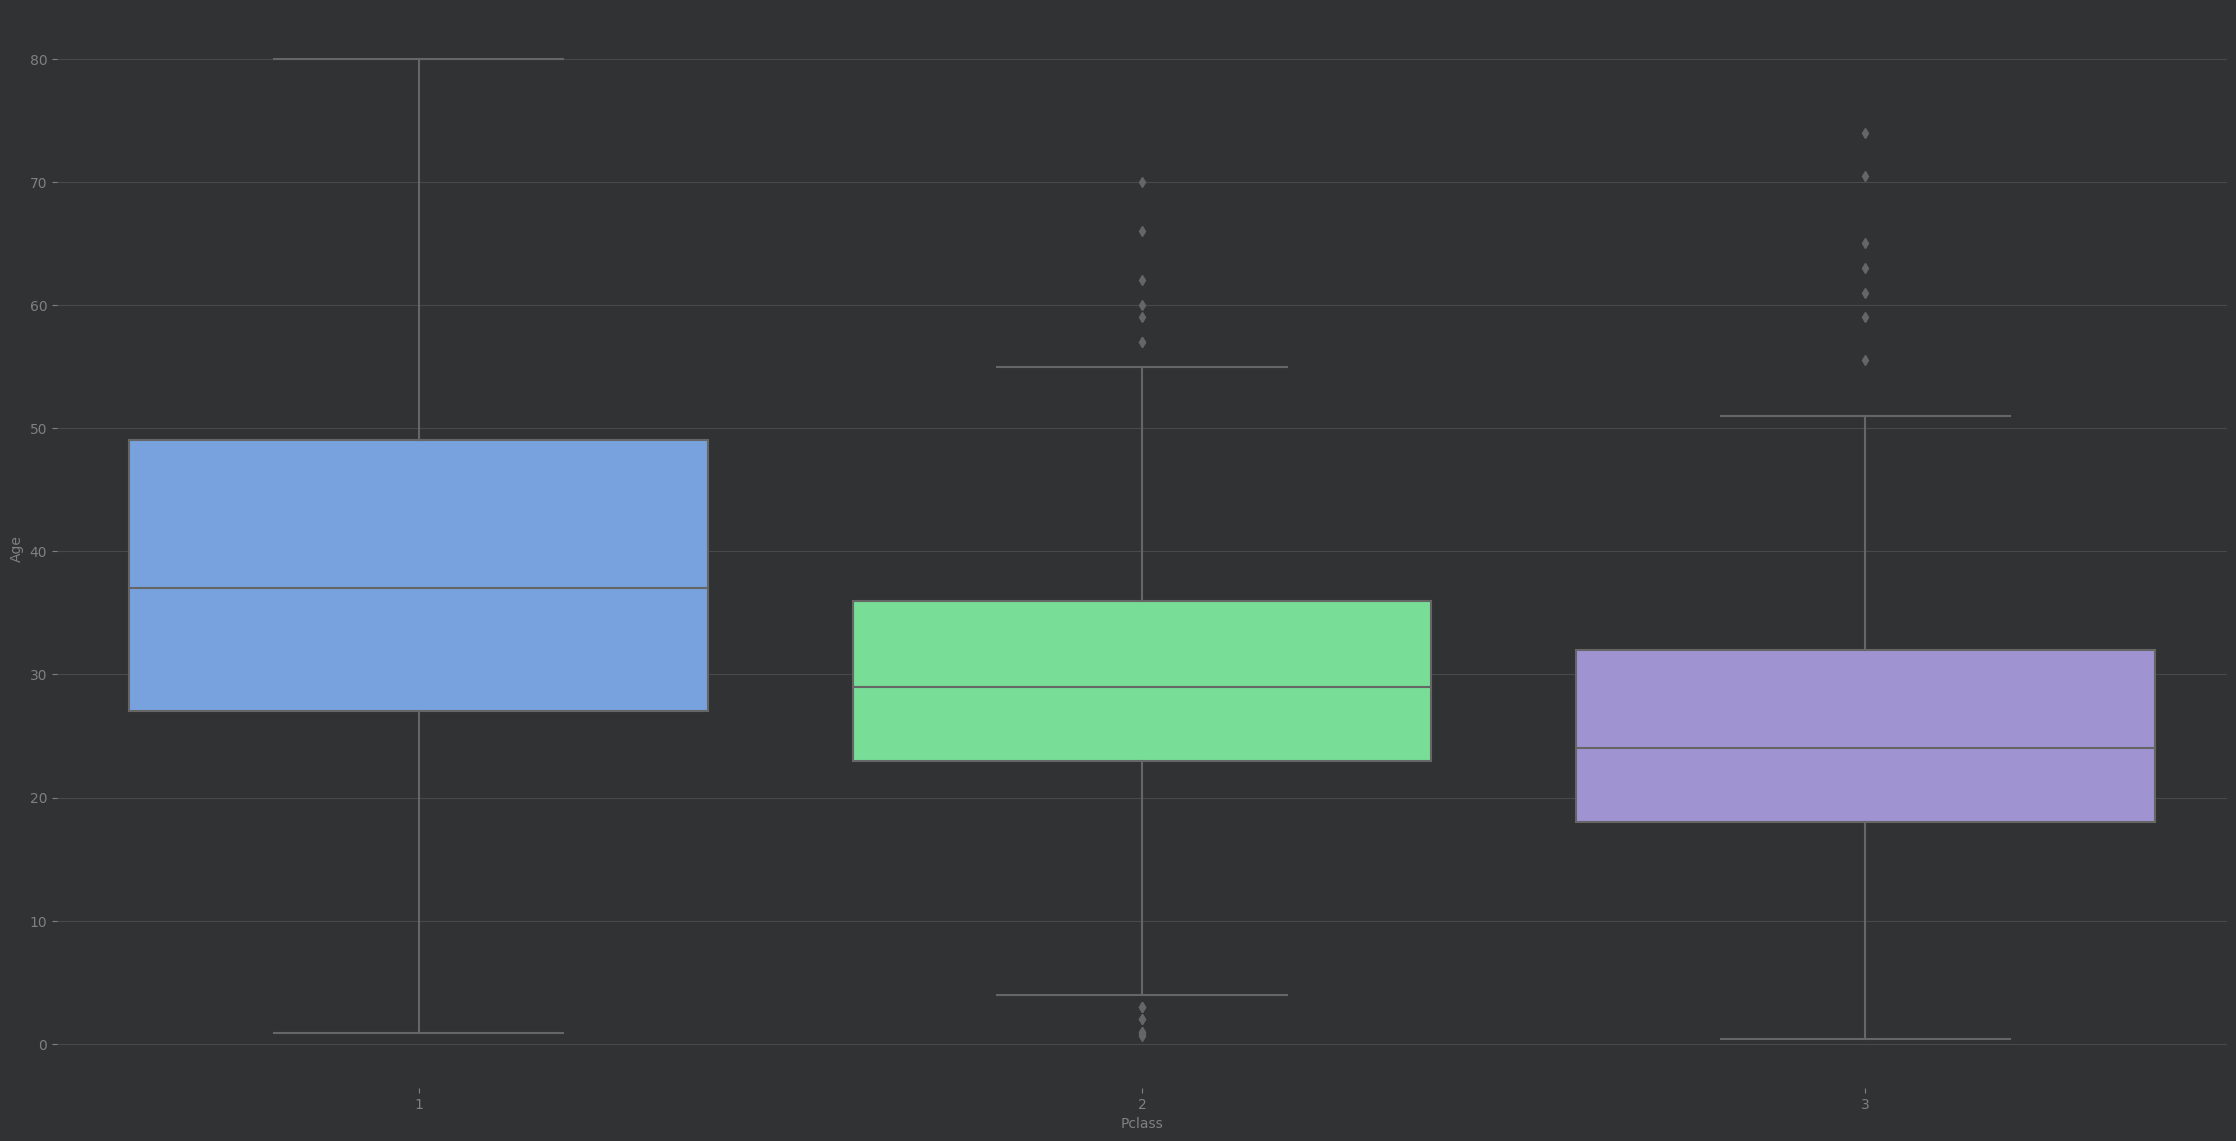

In [85]:
# check average age by passenger class
box_plot_avg = sns.boxplot(data=df, x='Pclass', y='Age')
fig = box_plot_avg.figure
fig.set_size_inches(28, 14)
plt.show() 

In [86]:
# fill the Age column where we have Null values using average age by class
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    # 37, 29, 24 is taken form boxplot
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

# apply the function to the Age, Pclass columns    
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [87]:
# drop cabin column, there is to many missing values 
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [88]:
# drop the 2 missing value from embarked
df.dropna(inplace=True)

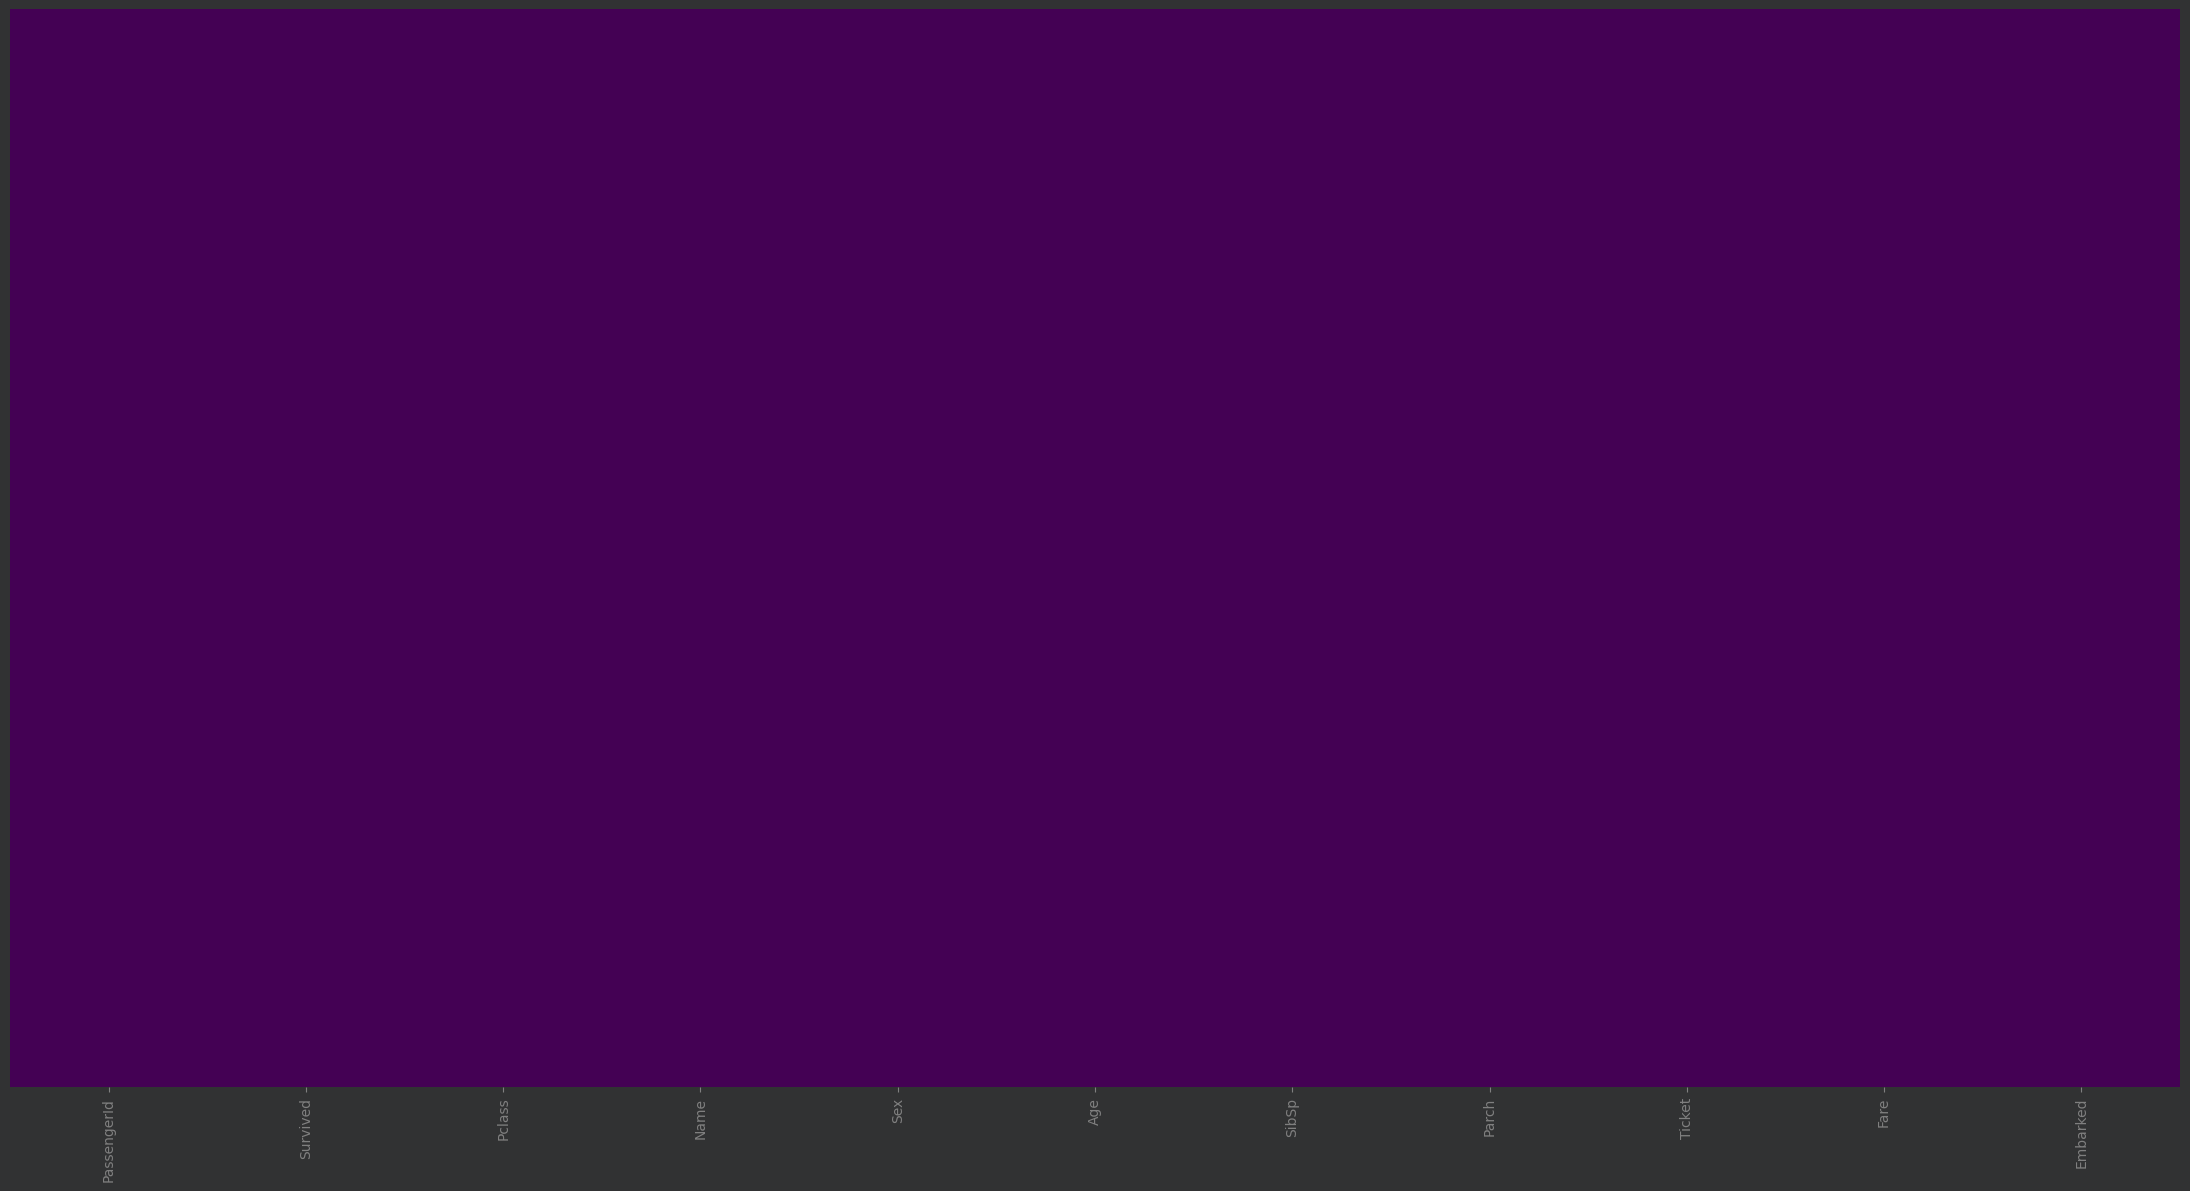

In [89]:
# plot the null values based on columns
heatmap_plot = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
fig = heatmap_plot.figure
fig.set_size_inches(28, 14)
plt.show()

In [90]:
# covert df['Sex'], df['Embark'] to int type for the ML to be able to use it
sex = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)

In [92]:
# add new columns to df
df = pd.concat([df, sex, embark], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [93]:
# drop unnecessary columns to have only numerical data
df.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model

In [94]:
# X is our features, y is what we want to predict 
X = df.drop('Survived', axis=1)
y = df['Survived']

In [95]:
# split into train and test data, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_train), len(X_test), len(y_train), len(y_test)

(622, 267, 622, 267)

In [96]:
# train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\UserHome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
# predict using the model
predictions = lr.predict(X_test)
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [99]:
# Report of prediction compared to y_test
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.77      0.68      0.72       110

    accuracy                           0.78       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267

